# **1.Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# **2.Load the Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ifood_df.csv to ifood_df (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv('ifood_df.csv')
print("Shape:", df.shape)
df.head()

Shape: (2205, 39)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


# **3.Exploratory data analysis**

In [ ]:
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())

df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

,count,mean,std,min,25%,50%,75%,max
Income,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
Kidhome,2205.0,0.442177,0.537132,0.0,0.0,0.0,1.0,2.0
Teenhome,2205.0,0.506576,0.544380,0.0,0.0,0.0,1.0,2.0
Recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
MntWines,2205.0,306.164626,337.493839,0.0,24.0,178.0,507.0,1493.0
MntFruits,2205.0,26.403175,39.784484,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2205.0,165.312018,217.784507,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2205.0,37.756463,54.824635,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2205.0,27.128345,41.130468,0.0,1.0,8.0,34.0,262.0
MntGoldProds,2205.0,44.057143,51.736211,0.0,9.0,25.0,56.0,321.0


# **4.Data Cleaning**

In [ ]:
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"Removed {before-after} duplicate rows.New shape: {df.shape}")

missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing


Removed 184 duplicate rows.New shape: (2021, 39)


,0


# **5.Prepare Features**

In [ ]:
features = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Recency'
]

features = [f for f in features if f in df.columns]
print("Using features:", features)

X = df[features].copy()

print("\nNaNs in selected features:")
print(X.isnull().sum())


Using features: ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Recency']

NaNs in selected features:
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
Recency                0
dtype: int64


# **6.Scaling**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=features)
X_scaled_df.head()


,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Recency
0,0.973297,1.549924,1.728456,2.448975,1.461111,0.853147,0.354046,1.411131,2.628352,-0.559667,0.315068
1,-0.875480,-0.637837,-0.728158,-0.648771,-0.631988,-0.733988,-0.174408,-1.131636,-0.587732,-1.178932,-0.375927
2,0.354075,0.569203,-0.177695,1.337431,-0.150816,-0.037197,-0.702863,1.411131,-0.230390,1.298128,-0.790525
3,-0.875480,-0.562397,-0.664468,-0.502995,-0.583871,-0.753344,-0.174408,-0.768384,-0.945075,-0.559667,-0.790525
4,-0.395509,0.418323,-0.218638,0.152998,-0.006464,-0.559791,1.410956,0.321373,0.126953,0.059598,1.558860


# **7. K-means clustering**

In [ ]:
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled_df)

df['Cluster'] = clusters
df['Cluster'] = df['Cluster'].astype(int)

print("Cluster counts:")
print(df['Cluster'].value_counts().sort_index())


Cluster counts:
Cluster
0    493
1    116
2    172
3    465
4    329
5    143
6    199
7    104
Name: count, dtype: int64


# **8.Analyzing cluster profiles**

In [ ]:
cluster_profile = df.groupby('Cluster')[features].mean().T
cluster_profile = cluster_profile.round(2)
cluster_profile

Cluster,0,1,2,3,4,5,6,7
MntWines,48.92,420.92,326.77,47.40,558.32,436.93,787.62,628.15
MntFruits,5.43,114.24,12.84,5.32,21.62,40.53,40.84,111.87
MntMeatProducts,23.76,392.12,106.67,25.08,143.48,260.88,535.72,550.74
MntFishProducts,7.81,131.84,20.45,6.98,26.94,106.52,66.87,122.01
MntSweetProducts,5.05,39.08,15.05,5.77,17.42,103.41,40.98,135.99
MntGoldProds,15.95,108.84,56.45,14.56,63.61,84.97,54.38,75.94
NumDealsPurchases,2.00,1.62,6.72,1.90,2.52,2.10,1.28,1.11
NumWebPurchases,2.19,5.06,6.07,2.16,6.50,6.22,4.99,5.58
NumCatalogPurchases,0.58,4.96,2.23,0.60,3.41,4.84,6.73,6.40
NumStorePurchases,3.36,8.80,6.20,3.34,8.29,8.06,8.51,8.32


# **9.Visualizations**

**Scatter plot:**

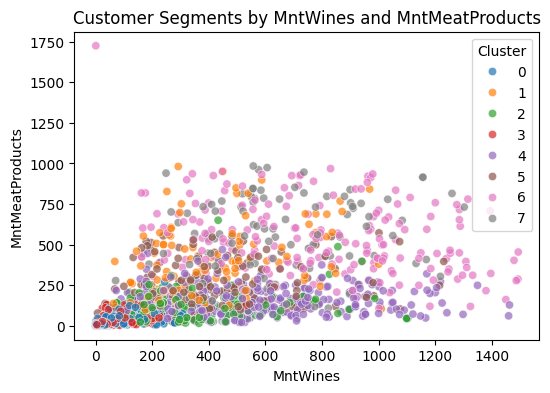

In [ ]:
feat_x = 'MntWines' if 'MntWines' in features else features[0]
feat_y = 'MntMeatProducts' if 'MntMeatProducts' in features else features[1]

plt.figure(figsize=(6,4))
sns.scatterplot(
    x=feat_x, y=feat_y,
    hue='Cluster', palette='tab10',
    data=df, alpha=0.7)
plt.title(f"Customer Segments by {feat_x} and {feat_y}")
plt.xlabel(feat_x)
plt.ylabel(feat_y)
plt.legend(title='Cluster')
plt.show()

**Bar chart: Average spend per cluster**

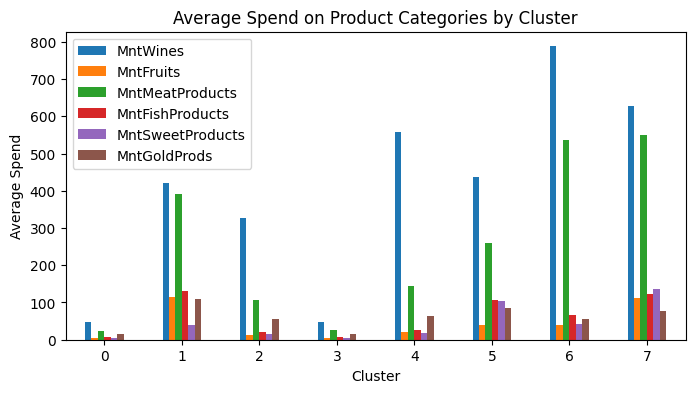

In [ ]:
spend_features = [f for f in features if f.startswith('Mnt')]

if spend_features:
    avg_spend_by_cluster = df.groupby('Cluster')[spend_features].mean()
    avg_spend_by_cluster.plot(
        kind='bar', figsize=(8,4), legend=True)
    plt.title("Average Spend on Product Categories by Cluster")
    plt.ylabel("Average Spend")
    plt.xticks(rotation=0)
    plt.show()
else:
    print("No spend features found for bar chart.")

**Cluster sizes:**

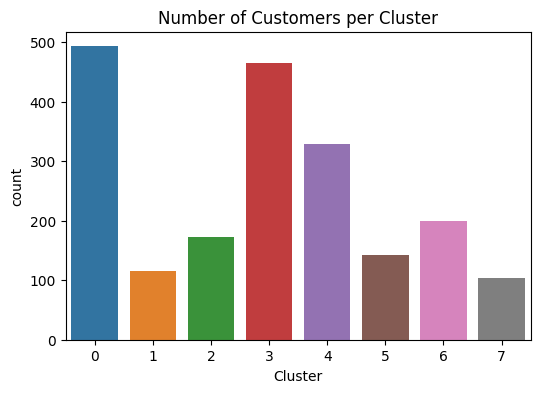

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Cluster', data=df, palette='tab10')
plt.title("Number of Customers per Cluster")
plt.show()

**Thank you!!**